# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [2]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 1.2 MB/s eta 0:00:08
   ---- ----------------------------------- 1.0/9.9 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.9 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.9 MB 1.7 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/9.9 MB 1.7 MB/s eta 0:00:06
   ------- -------------------------------- 1.8/9.9 MB 1.2 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.9 MB 1.5 MB/s eta 0:00:05
   ------------ --------------------------- 3.1/9.9 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.9/9.9 MB 1.9 MB/s eta 0:00:04
   ------------------- -------------------- 4.7/9.9 MB 2.1 MB/s eta 0:00:03
   --------------------- --------

In [3]:
import pandas as pd
import statsmodels.api as sm
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [5]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

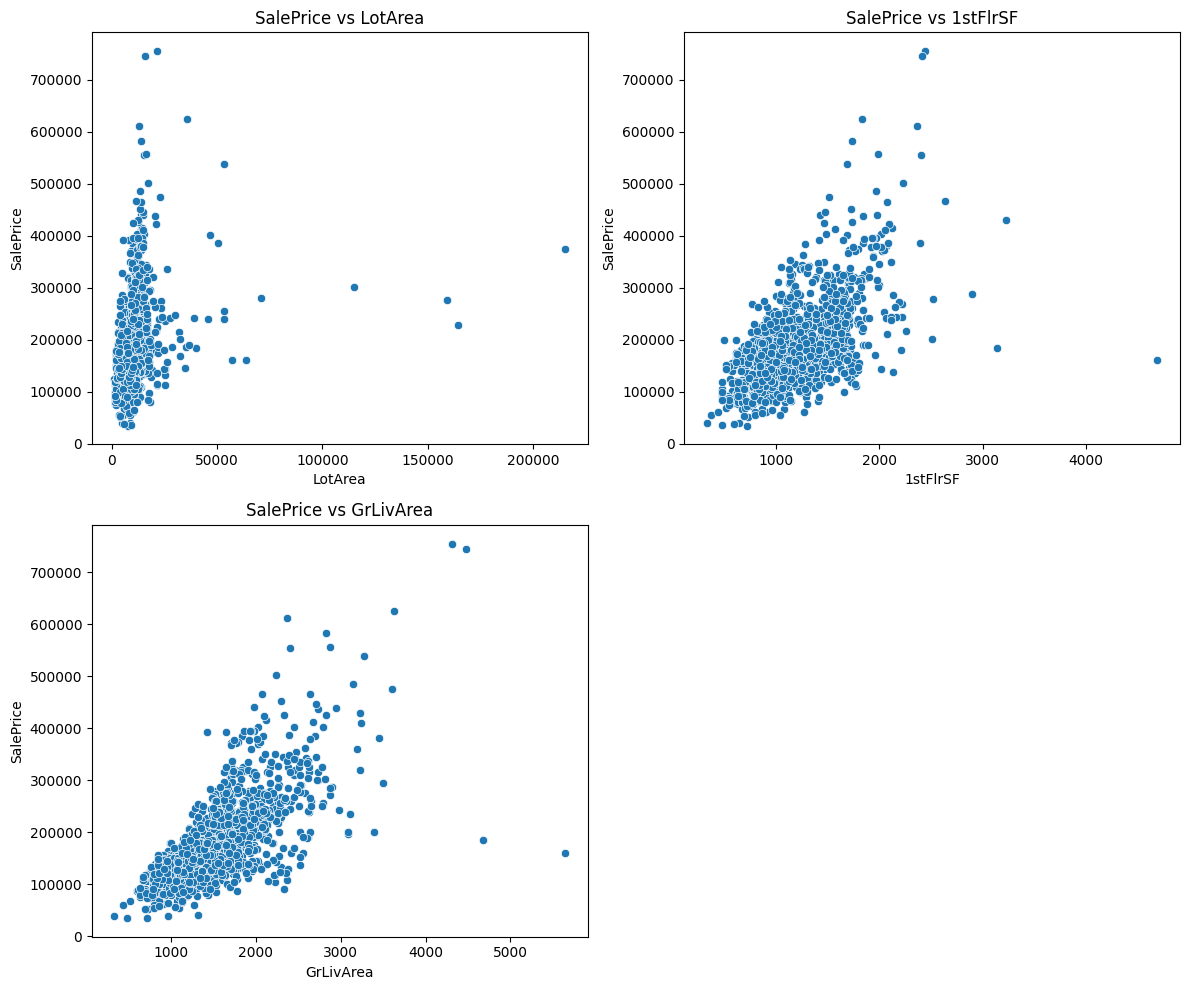

In [10]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
import seaborn as sns

#Creating the scatter plot
plt.figure(figsize=(12, 10))

# Scatter plots
features = ['LotArea', '1stFlrSF', 'GrLivArea']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=ames_subset[feature], y=ames_subset['SalePrice'])
    plt.title(f"SalePrice vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [ ]:
# Your written answer here - do these seem like good candidates for linear regression?
#The plots show the data needs to be refined more as there's no linear regression present

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [13]:
# Your code here - define y and baseline X
# Set dependent and independent variables
X = ames_subset['GrLivArea']  # Independent variable (baseline)
Y = ames_subset['SalePrice']  # Dependent variable (target)


In [14]:
# Your code here - import StatsModels, fit baseline model, display results
model = sm.OLS(Y,X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          1.647e+04
Date:                Mon, 03 Feb 2025   Prob (F-statistic):                        0.00
Time:                        22:24:43   Log-Likelihood:                         -18043.
No. Observations:                1460   AIC:                                  3.609e+04
Df Residuals:                    1459   BIC:                                  3.609e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Your written answer here - interpret model results
#The model is statistically significant overall but we have outliers affecting the results and so residuals not normally distributted.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [22]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
X = sm.add_constant(X)
Y = ames_subset['SalePrice']

In [23]:
# Your code here - fit model and display results
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):          1.57e-262
Time:                        22:34:20   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [ ]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?
#The multiple linear regressionis strong which can be explained by 92.9% in variance in SalePrice, the model is overally more statistically significant.

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

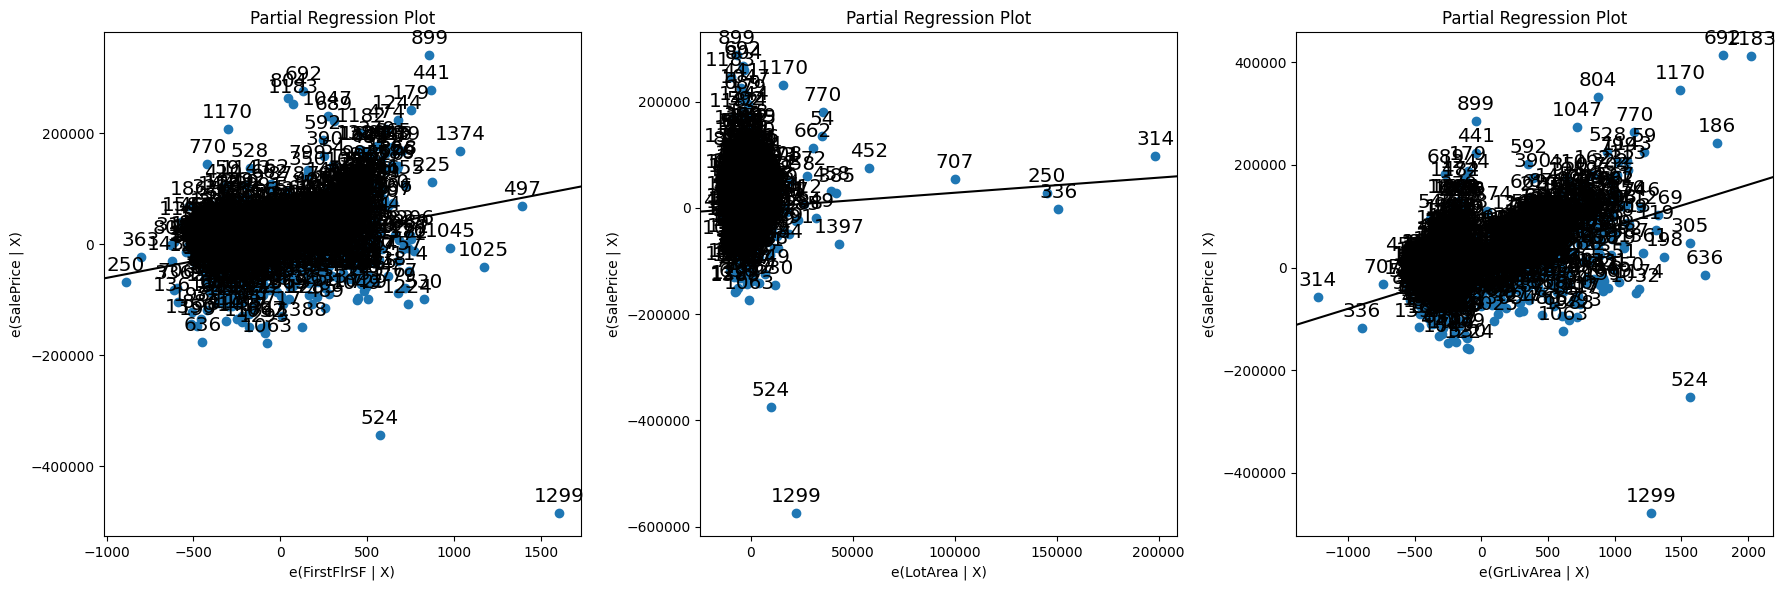

In [28]:
from statsmodels.graphics.regressionplots import plot_partregress

# Rename the column
ames_subset = ames_subset.rename(columns={'1stFlrSF': 'FirstFlrSF'})

# Proceed with plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plot_partregress('SalePrice', 'FirstFlrSF', ['LotArea', 'GrLivArea'], data=ames_subset, ax=axs[0])
plot_partregress('SalePrice', 'LotArea', ['FirstFlrSF', 'GrLivArea'], data=ames_subset, ax=axs[1])
plot_partregress('SalePrice', 'GrLivArea', ['FirstFlrSF', 'LotArea'], data=ames_subset, ax=axs[2])

plt.tight_layout()
plt.show()


In [ ]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [31]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define X and y
X = ames_subset[['LotArea', 'FirstFlrSF', 'GrLivArea']]  # Independent variables
y = ames_subset['SalePrice']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict values
y_pred = model.predict(X_test)

# Output the results
print("R-squared:", model.score(X_test, y_test))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R-squared: 0.6258987939113456
Coefficients: [ 0.30033318 56.21295883 77.7528426 ]
Intercept: -6261.597535369772


In [32]:
# Your code here - compare R-Squared
# R-squared from statsmodels OLS regression (uncentered)
r_squared_statsmodels = 0.929  # From your statsmodels output

# R-squared from scikit-learn linear regression
r_squared_sklearn = model.score(X_test, y_test)

# Print the comparison
print(f"R-squared (statsmodels): {r_squared_statsmodels:.3f}")
print(f"R-squared (scikit-learn): {r_squared_sklearn:.3f}")


R-squared (statsmodels): 0.929
R-squared (scikit-learn): 0.626


In [39]:
# Your code here - compare intercept and coefficients

# Define X and y as you've done before (make sure to include the constant term for the intercept)
X = sm.add_constant(ames_subset[['LotArea', 'FirstFlrSF', 'GrLivArea']])
y = ames_subset['SalePrice']

# Fit the model
results = sm.OLS(y, X).fit()

# Get intercept and coefficients from statsmodels
intercept_statsmodels = results.params[0]  # The intercept term (for OLS with constant)
coefficients_statsmodels = results.params[1:]  # The coefficients for LotArea, 1stFlrSF, GrLivArea

from sklearn.linear_model import LinearRegression

# Define X and y as you've done before (without adding the constant, as scikit-learn does this automatically)
X_sklearn = ames_subset[['LotArea', 'FirstFlrSF', 'GrLivArea']]
y_sklearn = ames_subset['SalePrice']

# Fit the model
model = LinearRegression()
model.fit(X_sklearn, y_sklearn)

# Get intercept and coefficients from scikit-learn
intercept_sklearn = model.intercept_  # Intercept term
coefficients_sklearn = model.coef_  # Coefficients for LotArea, 1stFlrSF, GrLivArea

# Print the comparison between the intercepts and coefficients
print("Intercept (statsmodels):", intercept_statsmodels)
print("Intercept (scikit-learn):", intercept_sklearn)

print("\nCoefficients (statsmodels):")
print(f"LotArea: {coefficients_statsmodels[0]}")
print(f"1stFlrSF: {coefficients_statsmodels[1]}")
print(f"GrLivArea: {coefficients_statsmodels[2]}")

print("\nCoefficients (scikit-learn):")
print(f"LotArea: {coefficients_sklearn[0]}")
print(f"1stFlrSF: {coefficients_sklearn[1]}")
print(f"GrLivArea: {coefficients_sklearn[2]}")


Intercept (statsmodels): -14313.408857494283
Intercept (scikit-learn): -14313.408857494389

Coefficients (statsmodels):
LotArea: 0.2841335889918201
1stFlrSF: 60.28664625293389
GrLivArea: 80.60605834382281

Coefficients (scikit-learn):
LotArea: 0.28413358899181546
1stFlrSF: 60.28664625293388
GrLivArea: 80.60605834382284


C:\Users\TILL-1\AppData\Local\Temp\ipykernel_2508\3263253702.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_statsmodels = results.params[0]  # The intercept term (for OLS with constant)
C:\Users\TILL-1\AppData\Local\Temp\ipykernel_2508\3263253702.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"LotArea: {coefficients_statsmodels[0]}")
C:\Users\TILL-1\AppData\Local\Temp\ipykernel_2508\3263253702.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access 

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.